In [2]:
#1 Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import requests and the API key.
import requests
from config import weather_api_key
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Import linregress
from scipy.stats import linregress

In [3]:
#2 Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4784e54b6b719f5fecd9b08fd1475198


In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | castro
Processing Record 3 of Set 1 | dwarka
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | faanui
Processing Record 6 of Set 1 | krasnyy chikoy
Processing Record 7 of Set 1 | juneau
Processing Record 8 of Set 1 | aljezur
Processing Record 9 of Set 1 | mar del plata
Processing Record 10 of Set 1 | lagoa
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | istanbul
Processing Record 13 of Set 1 | rimbey
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | changde
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | karaul
City not found. Skipping...
Processing Record 19 of Set 1 | aswan
Processing Record 20 of Set 1 | las vegas
Processing Record 21 of Set 1 | chuy
Processing Record 22 of Set 1 | cururupu
Pro

Processing Record 38 of Set 4 | paradwip
City not found. Skipping...
Processing Record 39 of Set 4 | mao
Processing Record 40 of Set 4 | harnai
Processing Record 41 of Set 4 | eruwa
Processing Record 42 of Set 4 | grand gaube
Processing Record 43 of Set 4 | atar
Processing Record 44 of Set 4 | rawson
Processing Record 45 of Set 4 | flin flon
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | tual
Processing Record 48 of Set 4 | fortuna
Processing Record 49 of Set 4 | saint-augustin
Processing Record 50 of Set 4 | kalomo
City not found. Skipping...
Processing Record 1 of Set 5 | novo oriente
Processing Record 2 of Set 5 | te horo
Processing Record 3 of Set 5 | kota bahru
Processing Record 4 of Set 5 | digboi
Processing Record 5 of Set 5 | port elizabeth
Processing Record 6 of Set 5 | harper
Processing Record 7 of Set 5 | sitrah
Processing Record 8 of Set 5 | grand-santi
Processing Record 9 of Set 5 | angoche
Processing Record 10 of Set 5 | ribeira grande
Proce

Processing Record 28 of Set 8 | coihaique
Processing Record 29 of Set 8 | korla
Processing Record 30 of Set 8 | severo-kurilsk
Processing Record 31 of Set 8 | atherton
Processing Record 32 of Set 8 | palma
Processing Record 33 of Set 8 | kalabo
Processing Record 34 of Set 8 | lebu
Processing Record 35 of Set 8 | san vicente
Processing Record 36 of Set 8 | vestmannaeyjar
Processing Record 37 of Set 8 | narsaq
Processing Record 38 of Set 8 | solnechnyy
Processing Record 39 of Set 8 | saint george
Processing Record 40 of Set 8 | camocim
Processing Record 41 of Set 8 | taoudenni
Processing Record 42 of Set 8 | soma
Processing Record 43 of Set 8 | agua dulce
Processing Record 44 of Set 8 | leshukonskoye
Processing Record 45 of Set 8 | port lincoln
Processing Record 46 of Set 8 | coxim
Processing Record 47 of Set 8 | colimes
Processing Record 48 of Set 8 | bull savanna
Processing Record 49 of Set 8 | liberal
Processing Record 50 of Set 8 | gigmoto
Processing Record 1 of Set 9 | santiago
Proc

Processing Record 20 of Set 12 | tabriz
Processing Record 21 of Set 12 | kruisfontein
Processing Record 22 of Set 12 | pudsey
Processing Record 23 of Set 12 | fairbanks
Processing Record 24 of Set 12 | casper
Processing Record 25 of Set 12 | furstenwalde
Processing Record 26 of Set 12 | florianopolis
Processing Record 27 of Set 12 | sri aman
Processing Record 28 of Set 12 | velingrad
Processing Record 29 of Set 12 | tuensang
Processing Record 30 of Set 12 | puri
Processing Record 31 of Set 12 | zemio
Processing Record 32 of Set 12 | itaituba
Processing Record 33 of Set 12 | aconibe
Processing Record 34 of Set 12 | aksu
Processing Record 35 of Set 12 | the valley
Processing Record 36 of Set 12 | marcona
City not found. Skipping...
Processing Record 37 of Set 12 | asyut
Processing Record 38 of Set 12 | phek
Processing Record 39 of Set 12 | watertown
Processing Record 40 of Set 12 | nagato
Processing Record 41 of Set 12 | mweka
Processing Record 42 of Set 12 | warwick
Processing Record 43

In [59]:
len(city_data)

559

In [60]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,58.80,66,0,16.15,NZ,2022-11-10 04:30:51
1,Castro,-24.7911,-50.0119,53.42,75,5,2.64,BR,2022-11-10 04:30:51
2,Dwarka,22.2394,68.9678,83.10,51,4,8.30,IN,2022-11-10 04:30:51
3,Faanui,-16.4833,-151.7500,79.18,78,99,14.74,PF,2022-11-10 04:30:52
4,Krasnyy Chikoy,50.3643,108.7512,31.06,87,100,5.50,RU,2022-11-10 04:30:52
5,Juneau,58.3019,-134.4197,32.22,85,100,10.36,US,2022-11-10 04:27:51
6,Aljezur,37.3191,-8.8033,58.41,82,11,6.24,PT,2022-11-10 04:30:52
7,Mar Del Plata,-38.0023,-57.5575,61.88,91,0,11.99,AR,2022-11-10 04:26:26
8,Lagoa,39.0500,-27.9833,67.57,87,66,26.06,PT,2022-11-10 04:30:53
9,Ushuaia,-54.8000,-68.3000,40.66,65,0,14.97,AR,2022-11-10 04:27:13


In [11]:
# Reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,2022-11-10 04:30:51,-46.6000,168.3333,58.80,66,0,16.15
1,Castro,BR,2022-11-10 04:30:51,-24.7911,-50.0119,53.42,75,5,2.64
2,Dwarka,IN,2022-11-10 04:30:51,22.2394,68.9678,83.10,51,4,8.30
3,Faanui,PF,2022-11-10 04:30:52,-16.4833,-151.7500,79.18,78,99,14.74
4,Krasnyy Chikoy,RU,2022-11-10 04:30:52,50.3643,108.7512,31.06,87,100,5.50
...,...,...,...,...,...,...,...,...,...
554,Black River,JM,2022-11-10 04:44:40,18.0264,-77.8487,74.75,81,6,1.92
555,Coos Bay,US,2022-11-10 04:41:06,43.3665,-124.2179,40.93,99,0,6.91
556,Madison Heights,US,2022-11-10 04:45:41,42.4859,-83.1052,60.04,49,0,6.91
557,North Myrtle Beach,US,2022-11-10 04:41:29,33.8160,-78.6800,62.65,83,100,17.27


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

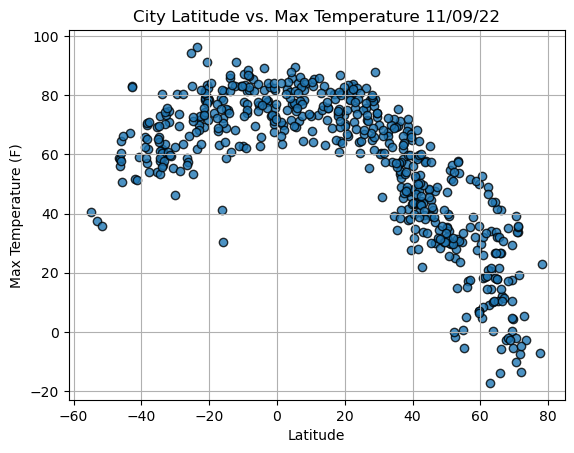

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

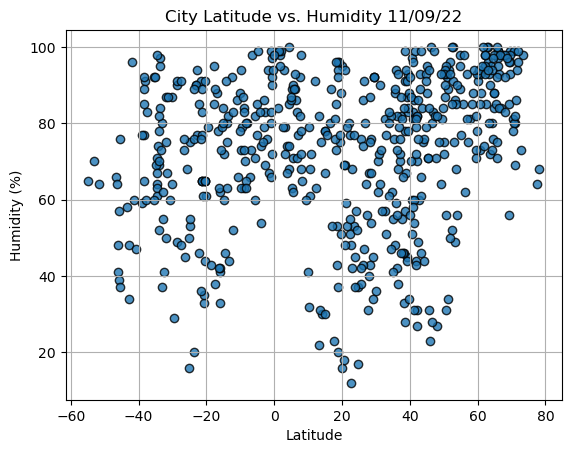

In [15]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

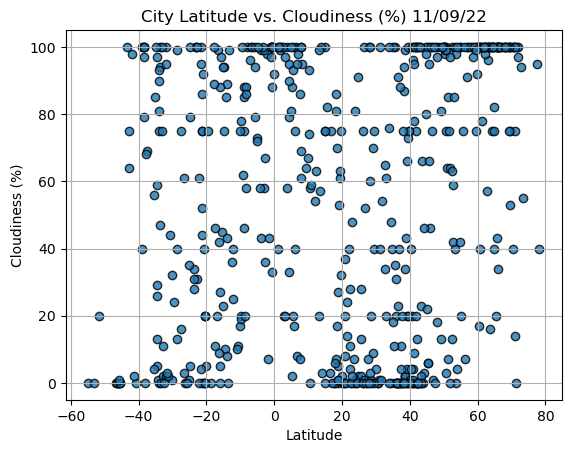

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

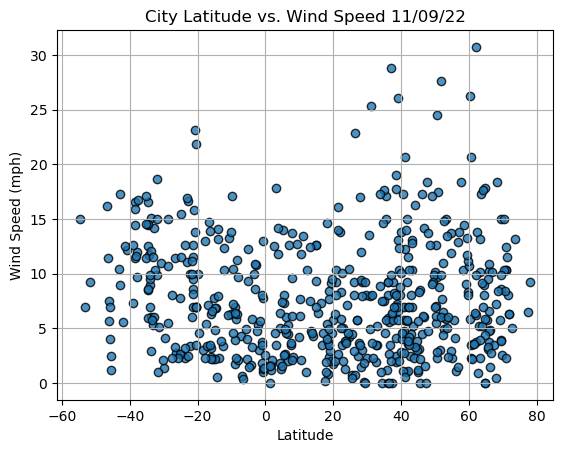

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [26]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [27]:
# Create new DataFrame
index13 = city_data_df.loc[13]
index13

City                    Busselton
Country                        AU
Date          2022-11-10 04:30:30
Lat                        -33.65
Lng                      115.3333
Max Temp                    61.02
Humidity                       84
Cloudiness                     94
Wind Speed                  15.08
Name: 13, dtype: object

In [28]:
# Get all N.H. latitudes >= 0
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3      False
4       True
       ...  
554     True
555     True
556     True
557     True
558     True
Name: Lat, Length: 559, dtype: bool

In [29]:
# Return a DF with all data fitting criteria, add loc method
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Dwarka,IN,2022-11-10 04:30:51,22.2394,68.9678,83.10,51,4,8.30
4,Krasnyy Chikoy,RU,2022-11-10 04:30:52,50.3643,108.7512,31.06,87,100,5.50
5,Juneau,US,2022-11-10 04:27:51,58.3019,-134.4197,32.22,85,100,10.36
6,Aljezur,PT,2022-11-10 04:30:52,37.3191,-8.8033,58.41,82,11,6.24
8,Lagoa,PT,2022-11-10 04:30:53,39.0500,-27.9833,67.57,87,66,26.06


In [30]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

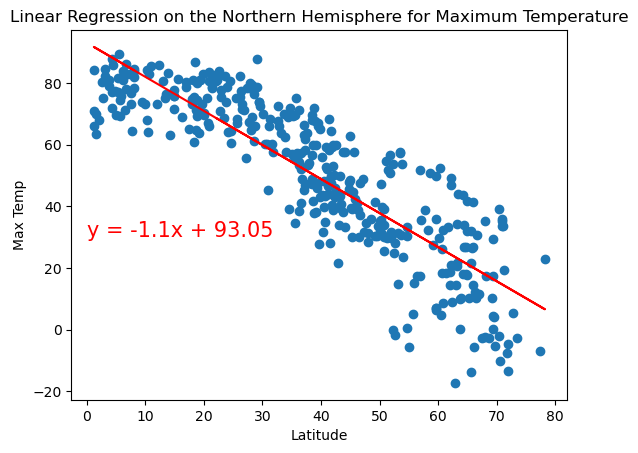

LinregressResult(slope=-1.1042161900488425, intercept=93.05070313354676, rvalue=-0.8638275237592138, pvalue=2.6545046602391534e-114, stderr=0.033166827011638464, intercept_stderr=1.442787468684327)


In [40]:
#22 Linear regression on the Northern Hemisphere for Max. Temp.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(0,30))
print(linregress(x_values, y_values))

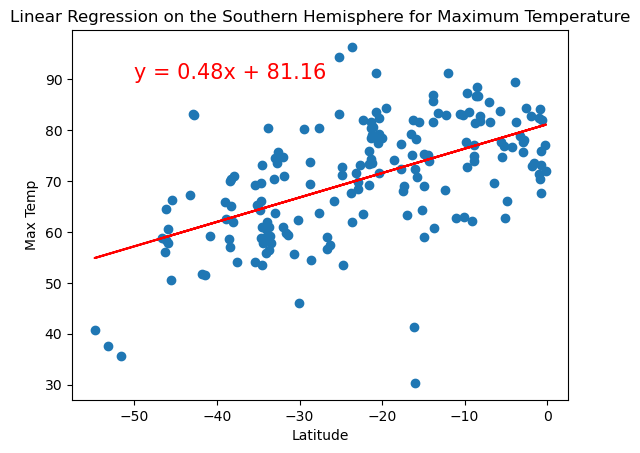

LinregressResult(slope=0.4797131917045209, intercept=81.15927731133941, rvalue=0.5597111510557412, pvalue=3.137641904492378e-16, stderr=0.05323516844171186, intercept_stderr=1.3761322993649254)


In [39]:
# Linear regression on the Southern Hemisphere for Max. Temp.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))
print(linregress(x_values, y_values))

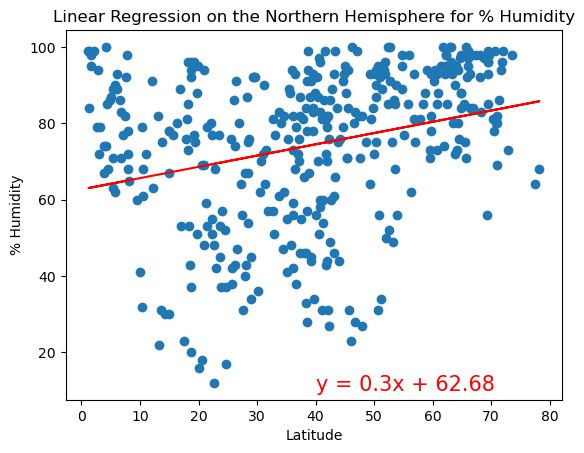

LinregressResult(slope=0.2952057690120637, intercept=62.68276429342094, rvalue=0.28176627142278043, pvalue=2.3947411973454727e-08, stderr=0.05177289828994374, intercept_stderr=2.2521686757671233)


In [44]:
# Linear regression on the Northern Hemisphere for % Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))
print(linregress(x_values, y_values))

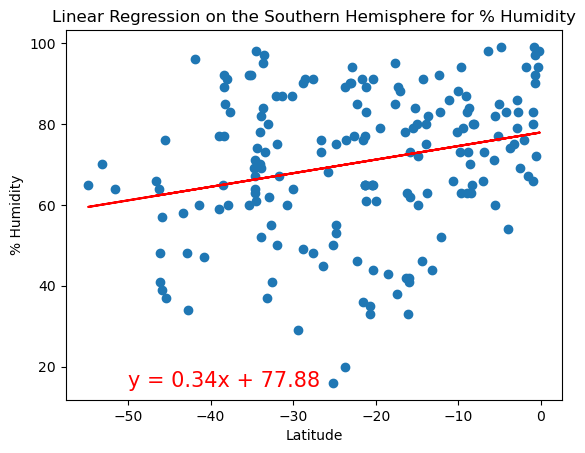

LinregressResult(slope=0.33565656072975036, intercept=77.8791568531767, rvalue=0.25262472708405903, pvalue=0.0006230660825430708, stderr=0.09635830115690876, intercept_stderr=2.4908678682803993)


In [45]:
# Linear regression on the Southern Hemisphere for % Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))
print(linregress(x_values, y_values))

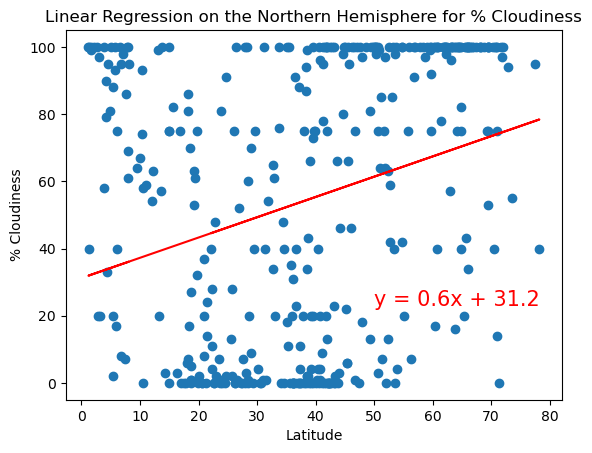

LinregressResult(slope=0.6035385092505096, intercept=31.201476324078882, rvalue=0.2866795109776336, pvalue=1.3287567580666876e-08, stderr=0.1038759952212466, intercept_stderr=4.518701296018968)


In [48]:
# Linear regression on Northern Hemisphere for % Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', "% Cloudiness",(50, 23))
print(linregress(x_values, y_values))

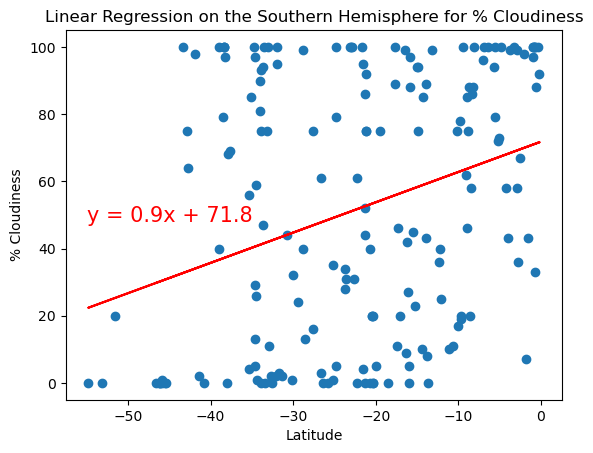

LinregressResult(slope=0.9017511919348661, intercept=71.80450261479244, rvalue=0.31229195670067605, pvalue=1.9733976243144872e-05, stderr=0.20560478157179923, intercept_stderr=5.314895943921333)


In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere for % Cloudiness", '% Cloudiness',(-55,48))
print(linregress(x_values, y_values))

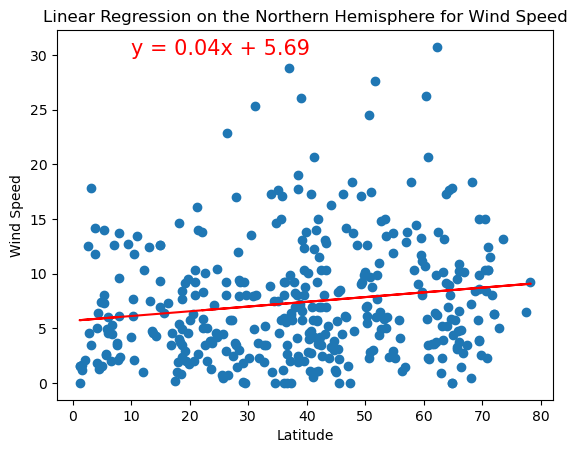

LinregressResult(slope=0.04330007110132824, intercept=5.6869088809938, rvalue=0.15623168577234015, pvalue=0.0022868082335612654, stderr=0.014098822893830363, intercept_stderr=0.6133117583807501)


In [56]:
# Linear regression on the Northern Hemisphere for Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(10,30))
print(linregress(x_values, y_values))

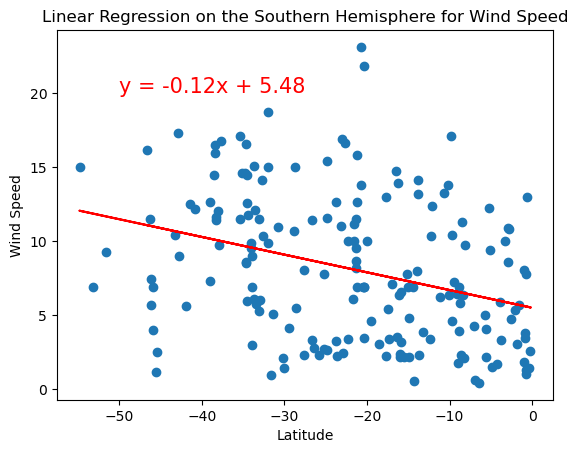

LinregressResult(slope=-0.1196748953807043, intercept=5.4811336182316275, rvalue=-0.329183997879885, pvalue=6.418971358003407e-06, stderr=0.025730522127590034, intercept_stderr=0.6651355413305413)


In [58]:
# Linear regression on the Southern Hemisphere for Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,20))
print(linregress(x_values, y_values))